In [38]:
%pylab inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Next we will import the dataset into a pandas dataframe

In [39]:
data = pd.read_csv('train.csv')
data

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
5,10000000,6,0,0,11:57,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
6,10000000,7,0,0,11:58,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
7,10000000,8,0,0,12:03,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
8,10000000,9,1,0,12:07,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,634
9,10000005,1,0,3,08:56,NY,10006,1,0,10,...,3.0,13.0,1,1,3,3,1,0,2,755


Let's have a look how many features the dataset has

In [40]:
data.columns

Index(['customer_ID', 'shopping_pt', 'record_type', 'day', 'time', 'state',
       'location', 'group_size', 'homeowner', 'car_age', 'car_value',
       'risk_factor', 'age_oldest', 'age_youngest', 'married_couple',
       'C_previous', 'duration_previous', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'cost'],
      dtype='object')

The detailed description about the dataset can be found here 
https://www.kaggle.com/c/allstate-purchase-prediction-challenge/data?train.csv.zip

But for simplicity I am putting it here again

Variable Descriptions

customer_ID - A unique identifier for the customer

shopping_pt - Unique identifier for the shopping point of a given customer

record_type - 0=shopping point, 1=purchase point

day - Day of the week (0-6, 0=Monday)

time - Time of day (HH:MM)

state - State where shopping point occurred

location - Location ID where shopping point occurred

group_size - How many people will be covered under the policy (1, 2, 3 or 4)

homeowner - Whether the customer owns a home or not (0=no, 1=yes)

car_age - Age of the customer’s car

car_value - How valuable was the customer’s car when new

risk_factor - An ordinal assessment of how risky the customer is (1, 2, 3, 4)

age_oldest - Age of the oldest person in customer's group

age_youngest - Age of the youngest person in customer’s group

married_couple - Does the customer group contain a married couple (0=no, 1=yes)

C_previous - What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)

duration_previous -  how long (in years) the customer was covered by their previous issuer

A,B,C,D,E,F,G - the coverage options

cost - cost of the quoted coverage options

Couple of things we can do from the dataset to show some interesting findings

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa4efa94c>,
        <matplotlib.axes._subplots.AxesSubplot object at 0xa27d5b6c>]], dtype=object)

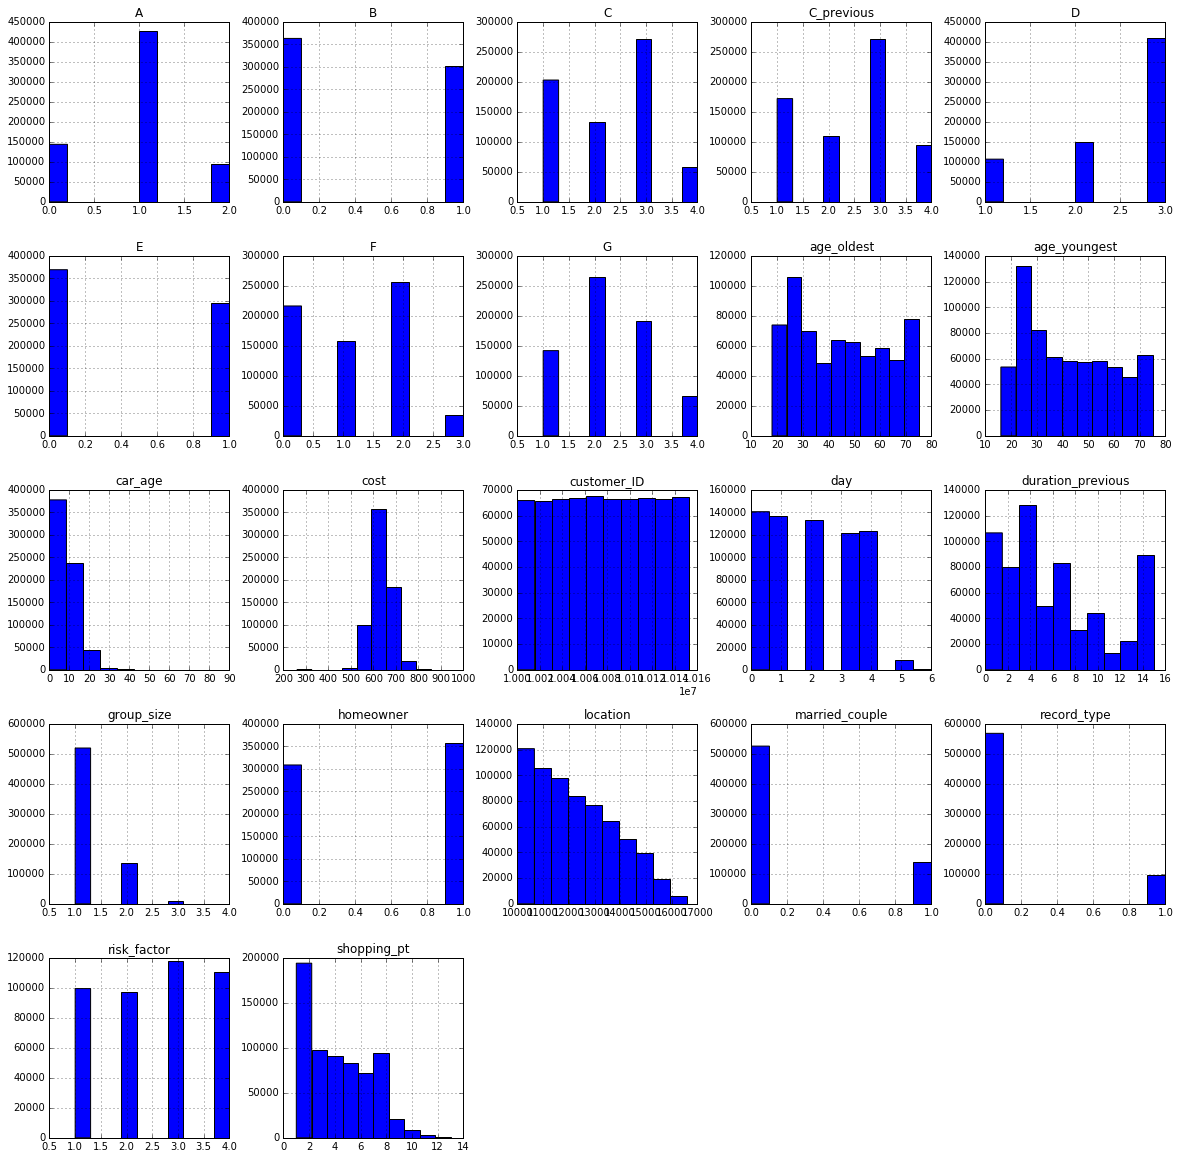

In [41]:
data.hist(figsize = (20,20), layout = (5,5))

As we can see from above we have created histograms for all the features. Couple of things to notice

- The number of older and younger customers' policy are kind of the same since there area is almost same
- The car age decreases steepily
- The rate of change of cost is high but the distribution is relatively uniform
- The duration previous has a very uncanny or non-uniform distribuion - may be we can explore it furthur later
- The location is monotonically decreasing

In [42]:
data.groupby('duration_previous').size().sort_values(ascending = False)

duration_previous
1.0     81570
15.0    79849
2.0     79595
3.0     70800
4.0     57485
5.0     49372
6.0     45379
7.0     37768
8.0     30752
9.0     26244
0.0     24926
10.0    18094
11.0    12718
12.0    11284
13.0    10963
14.0     9739
dtype: int64

As we can see from above that maximum number of customers was covered by their previous issuer for only 1 year. Even there are 24926 customers who were not even covered by their previous issuer. This finding throws some light on the sufferance of the customers who actually paid for some policy but they were not covered. Only 9739 customers were covered by their previous issuer for 14 years.

In [43]:
data.pivot_table('car_age', columns= 'age_oldest', aggfunc='mean').sort_values(ascending = False)[:10]

age_oldest
18    12.301321
19    10.836317
20    10.117583
21     9.243634
49     8.778858
55     8.730591
59     8.726522
53     8.633822
45     8.631894
48     8.623777
Name: car_age, dtype: float64

We can also see that the average car age for the old group age for a given customer above. It shows that age group 18 has the highest mean car age which implies that these people needs to be covered more.

The finding below also signifies or substantiates the point above.

In [44]:
data.pivot_table('car_age', columns= 'age_youngest', aggfunc='mean').sort_values(ascending = False)[:10]

age_youngest
18    10.670135
19    10.234630
17    10.095383
20     9.762760
16     9.646941
21     9.045000
55     8.811128
49     8.809179
53     8.780373
57     8.712610
Name: car_age, dtype: float64

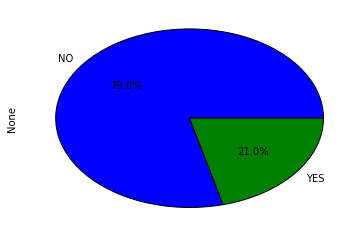

In [45]:
data.groupby('married_couple').size().plot.pie(labels = ['NO','YES'], autopct='%.1f%%')

The above finding shows that only 21% of the overall customers have married couples in their coverage policy. This can be useful to predict later if married couples are a factor in choosing a policy for a specific customer.

The busiest day of the week for shopping of the policy by the customer is Monday which shows that the agencies can put up offers and ads specific to their companies for selling their insurance policies.

In [46]:
data.groupby('day').size().sort_values(ascending = False)[:1]

day
0    140539
dtype: int64

We can also see from below that Florida state has the highest shopping point for the insurance coverage

In [47]:
data.groupby('state').size().sort_values(ascending = False)[:1]

state
FL    106287
dtype: int64

In [48]:
#a = data.groupby('group_size').size().values
#b = data.groupby('risk_factor').size().values

#p = pd.DataFrame(data = (a,b))
#p
#data.plot(x = 'group_size', y = 'risk_factor', kind = 'scatter') ------- needs to be fixed

We can also have a brief summary for the dataset as

In [49]:
data.drop(['homeowner', 'married_couple', 'location', 'state', 'record_type', 'day', 'time', 'group_size', 'homeowner', 'car_value', 'customer_ID', 'risk_factor', 'shopping_pt', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'C_previous'], axis=1).describe()

,car_age,age_oldest,age_youngest,duration_previous,cost
count,665249.000000,665249.000000,665249.000000,646538.000000,665249.000000
mean,8.139437,44.992403,42.577588,6.003774,635.785008
std,5.764598,17.403440,17.460432,4.680793,45.993758
min,0.000000,18.000000,16.000000,0.000000,260.000000
25%,3.000000,28.000000,26.000000,NaN,605.000000
50%,7.000000,44.000000,40.000000,NaN,635.000000
75%,12.000000,60.000000,57.000000,NaN,665.000000
max,85.000000,75.000000,75.000000,15.000000,922.000000


Next we try the cleaning and standardization of our data. We can see in the beginning that there are instances which have missing data in various features. We filter out and discard the missing data.

Now we try to see that if there are any outliers for some of the features viz. shopping_pt, car_age, cost - since the other features are having ordinal values.

{'boxes': [<matplotlib.lines.Line2D at 0xa2603e6c>,
 'caps': [<matplotlib.lines.Line2D at 0xa2607fec>,
 'fliers': [<matplotlib.lines.Line2D at 0xa260d0ec>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa260a5ec>,
 'whiskers': [<matplotlib.lines.Line2D at 0xa2604b2c>,
  <matplotlib.lines.Line2D at 0xa26111ac>]}

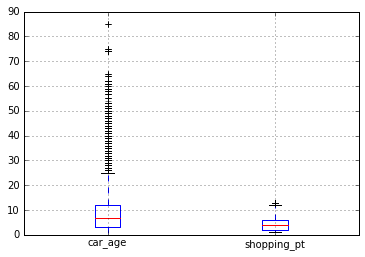

In [50]:
#data.boxplot(column=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
data.boxplot(column=['car_age', 'shopping_pt'])

{'boxes': [<matplotlib.lines.Line2D at 0xa4e996cc>,
 'caps': [<matplotlib.lines.Line2D at 0xa262af2c>,
 'fliers': [<matplotlib.lines.Line2D at 0xa263610c>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa263460c>,
 'whiskers': [<matplotlib.lines.Line2D at 0xa26286ac>,
  <matplotlib.lines.Line2D at 0xa263b1cc>]}

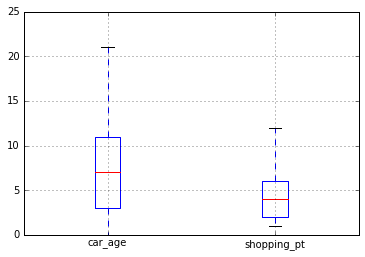

In [51]:
data['car_age'] = np.where((data['car_age'] > 21) | (data['car_age'] < -6), np.nan, data['car_age'])
data['shopping_pt'] = np.where((data['shopping_pt'] > 12) | (data['shopping_pt'] < -4), np.nan, data['shopping_pt'])

data.boxplot(column=['car_age', 'shopping_pt'])

As we can see there are no more outliers for the features car_age and shopping_pt. Next we see if there are any outliers for the cost feature. We find a lot of outliers.

{'boxes': [<matplotlib.lines.Line2D at 0xa25f568c>],
 'caps': [<matplotlib.lines.Line2D at 0xa25fa8cc>,
 'fliers': [<matplotlib.lines.Line2D at 0xa25fd98c>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa25fbe8c>],
 'whiskers': [<matplotlib.lines.Line2D at 0xa25f74cc>,
  <matplotlib.lines.Line2D at 0xa25f7e0c>]}

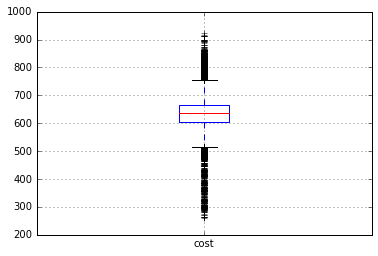

In [52]:
data.boxplot(column='cost')

{'boxes': [<matplotlib.lines.Line2D at 0xa2519d4c>],
 'caps': [<matplotlib.lines.Line2D at 0xa251efac>,
 'fliers': [<matplotlib.lines.Line2D at 0xa252508c>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa252358c>],
 'whiskers': [<matplotlib.lines.Line2D at 0xa251dbac>,
  <matplotlib.lines.Line2D at 0xa251e50c>]}

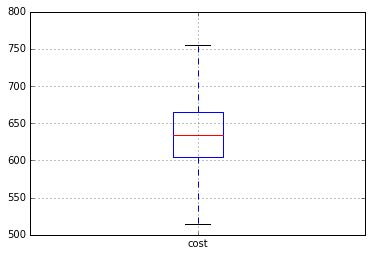

In [53]:
data['cost'] = np.where((data['cost'] > 755) | (data['cost'] < 515), np.nan, data['cost'])
data.boxplot(column='cost')

{'boxes': [<matplotlib.lines.Line2D at 0xa24d414c>,
 'caps': [<matplotlib.lines.Line2D at 0xa24d944c>,
 'fliers': [<matplotlib.lines.Line2D at 0xa24de34c>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa24db84c>,
 'whiskers': [<matplotlib.lines.Line2D at 0xa24d4f4c>,
  <matplotlib.lines.Line2D at 0xa24e13ec>]}

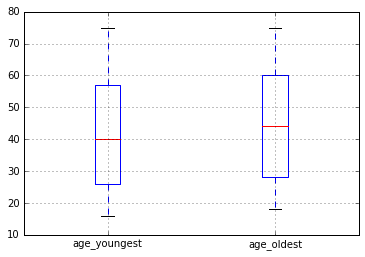

In [54]:
data.boxplot(column=['age_youngest', 'age_oldest'])

Fortunately the age group features do not have any outliers as we can see from above. Now we drop the instances having outliers and see a gradual decrease in the number of instances.

Next we perform sampling on the data after removing the outliers from the features which had numeric values. We use sampling with replacement over 100000 instances from our dataset.

In [55]:
sampler = np.random.randint(0, len(data), size=100000)
data = data.take(sampler)
data.dropna()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
140123,10032497,7.0,1,4,14:02,FL,12769,1,0,14.0,...,1.0,2.0,1,0,1,2,0,2,3,705.0
548165,10125949,2.0,0,1,14:26,FL,12167,2,1,9.0,...,3.0,15.0,1,0,3,3,0,2,3,616.0
67776,10015731,5.0,0,3,16:48,OK,14745,1,1,10.0,...,1.0,13.0,1,1,2,2,1,2,3,603.0
433750,10099686,4.0,0,2,11:54,NV,15380,3,1,5.0,...,4.0,15.0,2,1,4,3,1,2,3,719.0
209910,10048507,5.0,0,0,09:45,TN,14999,1,0,4.0,...,1.0,1.0,1,1,3,3,1,1,2,663.0
193371,10044754,3.0,0,3,09:39,FL,11216,1,1,11.0,...,2.0,9.0,1,1,2,3,1,2,3,626.0
110437,10025657,2.0,0,3,09:49,FL,11879,1,0,5.0,...,1.0,7.0,1,0,1,1,0,2,3,634.0
457467,10105170,5.0,0,0,11:48,NY,14505,2,1,13.0,...,4.0,15.0,1,0,4,3,0,0,4,631.0
445782,10102479,8.0,0,0,16:40,IN,11194,1,1,3.0,...,3.0,2.0,1,1,3,3,1,2,2,681.0
323820,10074419,1.0,0,0,11:56,FL,10149,1,1,9.0,...,1.0,11.0,1,0,2,3,0,2,3,646.0


We also drop all the instances having missing data on account of sampling. Now with the data cleaned and sampled, we may be interested in standardizing the data. Here, we use z-score normalization to rescale each feature. z-score normalization converts all features to a common scale with an average of zero and standard deviation of one.

In [ ]:
data_normalized = data.groupby('customer_ID').transform(lambda x: (x-x.mean())/x.std(ddof=1))
data_normalized['customer_ID'] = data['customer_ID']

In [ ]:
data_normalized.boxplot(column=['cost', 'car_age', 'age_youngest', 'age_oldest', 'group_size', 'shopping_pt'])

As we can see that most of our features have been normalized and mean is brought around 0 with standard deviation of 1.

Next we see that our dataset has a lot of features. We use Principal Component analysis(PCA) to reduce our dimensions. This will bring out those features which are really useful and later will be used for prediction. 